In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import seaborn as sns
import os
#plt.xkcd();

In [2]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
plt.style.use('seaborn-v0_8-colorblind')

In [4]:
use_xkcd = False

if use_xkcd:
    plt.xkcd();

In [ ]:
output_folder = os.environ["FIGURES_DIR"]

# two glacier evolutions

In [5]:
from oggm import utils, workflow, cfg, tasks, DEFAULT_BASE_URL
import xarray as xr

In [6]:
cfg.initialize()
working_dir = 'working_dir'
utils.mkdir(working_dir, reset=True)
cfg.PATHS['working_dir'] = working_dir

# for developing on airplain
cfg.PARAMS['has_internet'] = True

rgi_ids = ['RGI60-11.01328']

base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.6/L3-L5_files/2023.3/elev_bands/W5E5/'

gdirs = workflow.init_glacier_directories(
    rgi_ids,  # which glaciers?
    prepro_base_url=base_url,  # where to fetch the data?
    from_prepro_level=3,  # what kind of data? 
    prepro_border=80  # how big of a map?
)

gdir = gdirs[0]

2025-04-09 11:05:34: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-04-09 11:05:34: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-04-09 11:05:34: oggm.cfg: Multiprocessing: using all available processors (N=8)
2025-04-09 11:05:34: oggm.utils: Checking the download verification file checksum...
2025-04-09 11:05:35: oggm.workflow: init_glacier_directories from prepro level 3 on 1 glaciers.
2025-04-09 11:05:35: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers


In [7]:
minimise_for = 'area'
err_dmdtda_scaling_factor = 0.2
dynamic_spinup_start_year = 1980
ye = 2020
melt_f_max = cfg.PARAMS['melt_f_max']

In [8]:
workflow.execute_entity_task(
                tasks.run_dynamic_melt_f_calibration, gdirs,
                err_dmdtda_scaling_factor=err_dmdtda_scaling_factor,
                ys=dynamic_spinup_start_year, ye=ye,
                melt_f_max=melt_f_max,
                kwargs_run_function={'minimise_for': minimise_for},
                ignore_errors=True,
                kwargs_fallback_function={'minimise_for': minimise_for},
                output_filesuffix='_spinup_historical',)

workflow.execute_entity_task(
                tasks.run_dynamic_melt_f_calibration, gdirs,
                err_dmdtda_scaling_factor=10.,
                ys=dynamic_spinup_start_year, ye=ye,
                melt_f_max=melt_f_max,
    maxiter=2,
                kwargs_run_function={'minimise_for': minimise_for,
                                     'precision_percent':100},
                ignore_errors=True,
                kwargs_fallback_function={'minimise_for': minimise_for,},
                output_filesuffix='_fg_spinup_historical',)

ds_fg = xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_fg_spinup_historical'))
ds_spn = xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_spinup_historical'))

2025-04-09 11:05:38: oggm.workflow: Execute entity tasks [run_dynamic_melt_f_calibration] on 1 glaciers
2025-04-09 11:05:38: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_melt_f_calibration_spinup_historical
2025-04-09 11:05:39: oggm.core.flowline: (RGI60-11.01328) init_present_time_glacier_dyn_melt_f_calib
2025-04-09 11:05:39: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_spinup_spinup_historical
2025-04-09 11:05:42: oggm.core.flowline: (RGI60-11.01328) init_present_time_glacier_dyn_melt_f_calib
2025-04-09 11:05:42: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_spinup_spinup_historical
2025-04-09 11:05:43: oggm.core.flowline: (RGI60-11.01328) init_present_time_glacier_dyn_melt_f_calib
2025-04-09 11:05:43: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_spinup_spinup_historical
2025-04-09 11:05:44: oggm.core.dynamic_spinup: Dynamic melt_f calibration worked for RGI60-11.01328!
2025-04-09 11:05:44: oggm.workflow: Execute entity tasks [run_dynamic_melt_f

In [9]:
workflow.execute_entity_task(
                tasks.run_dynamic_melt_f_calibration, gdirs,
                err_dmdtda_scaling_factor=10.,
                ys=dynamic_spinup_start_year, ye=ye,
                melt_f_max=melt_f_max,
    maxiter=2,
                kwargs_run_function={'minimise_for': minimise_for,
                                     'precision_percent':100},
                ignore_errors=True,
                kwargs_fallback_function={'minimise_for': minimise_for,},
                output_filesuffix='_fg_spinup_historical',)

2025-04-09 11:05:45: oggm.workflow: Execute entity tasks [run_dynamic_melt_f_calibration] on 1 glaciers
2025-04-09 11:05:45: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_melt_f_calibration_fg_spinup_historical
2025-04-09 11:05:45: oggm.core.flowline: (RGI60-11.01328) init_present_time_glacier_dyn_melt_f_calib
2025-04-09 11:05:45: oggm.core.dynamic_spinup: (RGI60-11.01328) run_dynamic_spinup_fg_spinup_historical
2025-04-09 11:05:47: oggm.core.dynamic_spinup: Dynamic melt_f calibration worked for RGI60-11.01328!


In [10]:
ds_fg = xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_fg_spinup_historical'))
ds_spn = xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_spinup_historical'))

In [38]:
c_fg = 'C0'
c_spn = 'C1'
c_v = 'C2'
c_dv = 'C3'
c_a = 'C2'

def plot_volume_and_area(ax_v, ax_a, facecolor,
                         c_fg='C0', c_spn='C2', c_v='C1', c_dv='C1', c_a='C1',
                         slide_nr=2,
                        ):
    text_fontsize = 11
    
    ms_v = 15
    mew_v = 2
    
    ms_dv = 8
    ms_dv_cross = 7
    mew_dv = 2
    mew_dv_cross = 2
    
    ms_a = 10
    mew_a = 2
    
    slope_fg = 0.6e9
    bias_fg = 0.1e9
    slope_spn = 0.25e9
    bias_spn = 0e9
    
    # volume plot
    dv = (gdir.get_diagnostics()['dmdtda_mismatch_dynamic_calibration_reference'] *
          20 * gdir.rgi_area_m2 / cfg.PARAMS['ice_density']) + 0.04e9
    volume_fg = ds_fg.volume_m3 + np.linspace(0, slope_fg, len(ds_fg.volume_m3)) + bias_fg
    volume_spn = ds_spn.volume_m3 + np.linspace(0, slope_spn, len(ds_spn.volume_m3)) + bias_spn
    
    # volume evolution guesses
    volume_fg.plot(ax=ax_v, c=c_fg, zorder=5)
    if slide_nr > 1:
        volume_spn.plot(ax=ax_v, c=c_spn, zorder=5)
    
    # total volume
    ax_v.plot(2000,
                  2.7e9,
                  marker='o',
                  ms = ms_v,
                  mec=c_v, mfc='none',
              mew=mew_v,
                 )
    xy_v_obs = [0.05, 0.3]
    xy_v_obs_arrow = [0.15, 0.49]
    ax_v.text(
        xy_v_obs[0], xy_v_obs[1],
        'Total volume',
        fontsize=text_fontsize,
        ha='left',
        va='center',
        transform=ax_v.transAxes,
        c=c_v,
    )
    ax_v.annotate(
        '',
        xy = xy_v_obs_arrow,
        xytext=[xy_v_obs[0] + 0.03, xy_v_obs[1] + 0.06],
        xycoords=ax_v.transAxes, textcoords=None,
        arrowprops=dict(arrowstyle='simple', facecolor=c_dv, edgecolor=c_dv, #shrink=0.05,
                        
                       ),
        annotation_clip=None,
        ha='center', va='center',
        
    )
    
    # volume change
    def plot_volume_change(volume):
        ax_v.plot(2000,
                  volume.sel(time=2000),
                  marker='+',
                  mec=c_dv,
                  c=c_dv,
                  ms=ms_dv_cross,
                  mew=mew_dv_cross,
                 )
        ax_v.plot([2000, 2020],
                 [volume.sel(time=2000), volume.sel(time=2000) + dv],
                 '--', c=c_dv, zorder=1)
        ax_v.plot(2020,
                     volume.sel(time=2000) + dv,
                     marker='o', ms=ms_dv,
                     mec=c_dv, mfc=facecolor,
                     mew=mew_dv,
                    )
    plot_volume_change(volume_fg)
    if slide_nr > 1:
        plot_volume_change(volume_spn)

    xy_dv_text = [0.5, 0.1]
    xy_dv_arrow_fg = [0.57, 0.6]
    xy_dv_arrow_spn = [0.48, 0.4]

    xy_dv_arrow_text_fg = [xy_dv_text[0] + 0.05, xy_dv_text[1] + 0.05]
    xy_dv_arrow_text_spn = [xy_dv_text[0], xy_dv_text[1] + 0.05]
    ax_v.text(xy_dv_text[0] + 0.02,
              xy_dv_text[1],
              'Volume-change',
              transform=ax_v.transAxes,
              ha='center',
              va='center',
              fontsize=text_fontsize,
              c=c_dv,
             )
    ax_v.annotate(
        '',
        xy = xy_dv_arrow_fg, xytext=xy_dv_arrow_text_fg,
        xycoords=ax_v.transAxes, textcoords=None,
        arrowprops=dict(arrowstyle='simple', facecolor=c_dv, edgecolor=c_dv, #shrink=0.05,
                        
                       ),
        annotation_clip=None,
        ha='center', va='center',
        
    )
    if slide_nr > 1:
        ax_v.annotate(
            '',
            xy = xy_dv_arrow_spn, xytext=xy_dv_arrow_text_spn,
            xycoords=ax_v.transAxes, textcoords=None,
            arrowprops=dict(arrowstyle='simple', facecolor=c_dv, edgecolor=c_dv, #shrink=0.05,
                            
                           ),
            annotation_clip=None,
            ha='center', va='center',
        )
    
    # area guesses
    ds_fg.area_m2.plot(ax=ax_a, c=c_fg)
    if slide_nr > 1:
        ds_spn.area_m2.plot(ax=ax_a, c=c_spn)
    
    # total area
    ax_a.plot(2000,
              gdir.rgi_area_m2,
              marker='o',
              ms = ms_a,
              mec=c_a, mfc='none',
              mew=mew_a,
                 )
    
    xy_a_obs = [0.06, 0.2]
    xy_a_obs_arrow = [0.18, 0.48]
    ax_a.text(
        xy_a_obs[0], xy_a_obs[1],
        'Total area',
        fontsize=text_fontsize,
        ha='left',
        va='center',
        transform=ax_a.transAxes,
        c=c_a,
    )
    ax_a.annotate(
        '',
        xy = xy_a_obs_arrow,
        xytext=[xy_a_obs[0] + 0.06, xy_a_obs[1] + 0.06],
        xycoords=ax_a.transAxes, textcoords=None,
        arrowprops=dict(arrowstyle='simple', facecolor=c_dv, edgecolor=c_dv, #shrink=0.05,
                        
                       ),
        annotation_clip=None,
        ha='center', va='center',
        
    )

    # add labels to area
    year_label_fg = 2015
    year_label_spn = 2017
    ax_a.text(
        year_label_fg+1, ds_fg.area_m2.sel(time=year_label_fg),
            'First guess',
            fontsize=text_fontsize,
            c=c_fg,
            ha='center',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'),
           )

    if slide_nr > 1:
        ax_a.text(
            year_label_spn, ds_spn.area_m2.sel(time=year_label_spn),
                'Next guess',
                fontsize=text_fontsize,
                c=c_spn,
                ha='center', #'left',
                va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'),
               )

    ax_a.text(
        1., 0.9,
        'Ø shows uncertainty',
        fontsize=text_fontsize,
        ha='right',
        va='center',
        transform=ax_a.transAxes,
        c=c_v,
    )

    # style axis
    xlim = [1995, 2021]
    ylim_v = [2e9, 3.4e9]
    ylim_a = [2.27e7, 2.47e7]

    # volume ax
    ax_v.set_xticks([])
    ax_v.set_yticks([])
    ax_v.set_xlabel('')
    ax_v.spines[['right', 'top']].set_visible(False)
    ax_v.set_ylabel('Volume')
    ax_v.set_xlim(xlim)
    ax_v.set_ylim(ylim_v)
    ax_v.set_title('Glacier evolution model run', fontsize=text_fontsize)

    # area ax
    ax_a.set_xticks([])
    ax_a.set_yticks([])
    ax_a.spines[['right', 'top']].set_visible(False)
    ax_a.set_ylabel('Area')
    ax_a.set_xlabel('Time')
    ax_a.set_xlim(xlim)
    ax_a.set_ylim(ylim_a)

    dx = 0.1
    dy = 0.2
    
    xy_v = [-dx, 1+dy]
    xy_a = [-dx, 1]
    width = 1 + 2 * dx

    ax_v.add_patch(plt.Rectangle(xy_v, width, - (1 + 4 * dy),
                               facecolor=facecolor,
                               edgecolor=facecolor,
                               transform=ax_v.transAxes,
                               clip_on=False, zorder=0,)
                )

    ax_a.add_patch(plt.Rectangle(xy_a, width, - (1 + dy),
                               facecolor=facecolor,
                               edgecolor=facecolor,
                               transform=ax_a.transAxes,
                               clip_on=False, zorder=0,)
                )

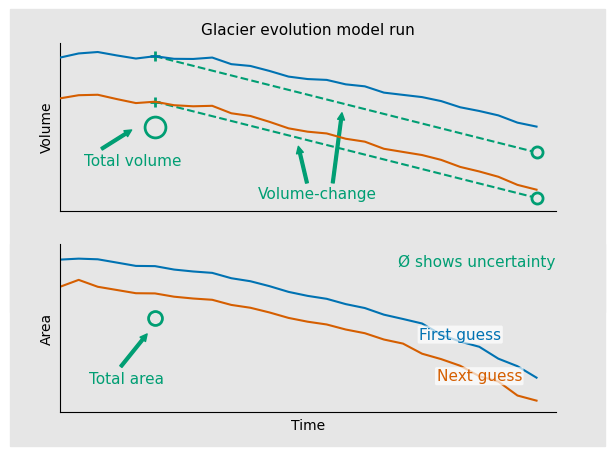

In [40]:
fig, axs = plt.subplots(2, 1)
facecolor = (0.9, 0.9, 0.9, 1)

plot_volume_and_area(axs[0], axs[1], facecolor, slide_nr=2)

In [35]:
axs[1].get_ylim()

(22750527.913598314, 24720826.109280445)

# plot for dynamic evolution

In [25]:
def plot_dynamic_evolution(ax, color1, color2, color3, axis_label_fontsize, text_fontsize, facecolor,
                           xy=(-0.1, -0.1)):
    add_jobs_text = False

    x = np.linspace(0, 7, 100)
    def get_y1_values(x):
        return np.sin(x + 0.5) - 0.3 * x + 1
    def get_y2_values(x):
        return np.sin(x * 0.9 + 1) * 0.9 * (1.5 - x / 7) - 0 * x
    y1 = get_y1_values(x)
    y2 = get_y2_values(x)

    obs = [#(1, 0.2, 'top'),
           #(2.5, -0.7, 'top'),
           (1.4, 0.4, 'top'),
           #(4.5, 0, 'bottom'),
           (4, -0.2, 'bottom'),
           #(6, 0.7, 'bottom')
           (5.2, 0.5, 'bottom')
          ]
    arrow_dis = 0.03

    # add curves with text
    ax.plot(x, y1, label='y1', c=color1)
    ax.plot(x, y2, label='y2', c=color2)
    ax.text(8, #x[-1] + 0.1 - 1.3,
            y1[-1] - 0.7,
            'First guess',
            fontsize=text_fontsize,
            c=color1,
            ha='right',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'),
           )
    ax.text(8,#0.11, #x[-1] + 0.1 - 1.7,
            y2[0] - 0.5,
            'Next guess',
            fontsize=text_fontsize,
            c=color2,
            ha='right', #'left',
            va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'),
           )

    for ob in obs:
        ax.plot(ob[0], ob[1], 'o', mec=color3, mfc='white', c='white', mew=2)
        ax.text(ob[0] - 0.2, # -0.07
                ob[1],
                r'$Obs$',
                c=color3,
                ha='right',
                va=ob[2],
                fontsize=text_fontsize - 1)

        if add_jobs_text:
            # draw Jobs arrow with text
            y_arrow_2 = get_y2_values(ob[0])
            y_arrow_1 = ob[1]
            if y_arrow_2 < y_arrow_1:
                y_arrow_2 += arrow_dis
                y_arrow_1 -= arrow_dis
            else:
                y_arrow_2 -= arrow_dis
                y_arrow_1 += arrow_dis
            ax.annotate("", xy=(ob[0], y_arrow_1),
                        xytext=(ob[0], y_arrow_2),
                        arrowprops=dict(arrowstyle='<->'),
                        zorder=1)
            ax.text(ob[0] - 0.05,
                    (y_arrow_1 + y_arrow_2) / 2,
                    r'$\mathcal{J}_{Obs}$',
                    ha='right',
                    va='center',
                    fontsize=text_fontsize - 1)

    # add surrounding box
    ax.add_patch(plt.Rectangle(xy, 1 - 2 * xy[0], 1 - 2 * xy[1],
                               facecolor=facecolor,
                               edgecolor=facecolor,
                               transform=ax.transAxes,
                               clip_on=False),
                )

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel('Model state', fontsize=axis_label_fontsize)
    ax.set_xlabel('Time', fontsize=axis_label_fontsize)
    ax.set_xlim([0, 7])
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title('Forward model run', fontsize=text_fontsize)


# first guess plot

In [26]:
def plot_fg_text(ax, color, fontsize, facecolor, pad=7):
    ax.text(0.5, 0,
            'First guess control variables',
            color=color,
            fontsize=fontsize,
            transform=ax.transAxes,
            va='center', ha='center',
            #backgroundcolor=facecolor,
            bbox=dict(fc=facecolor,
                      pad=pad,
                      ec=facecolor)
           )

    ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_facecolor(facecolor)

# cost function min plot

In [27]:
def plot_cost_fkt_min_text(ax, fontsize, facecolor, pad=7):
    ax.text(0.5, 0.5,
            'Cost function\n' +
            #r'$\mathcal{J}=\mathcal{J}_{Obs} + \mathcal{J}_{Reg}$' +
            'minimum?',
            fontsize=fontsize,
            transform=ax.transAxes,
            va='center', ha='center',
            bbox=dict(fc=facecolor,
                      pad=pad,
                      ec=facecolor)
           )
    ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_facecolor(facecolor)

# update controls text

In [28]:
def plot_update_controls_text(ax, fontsize, color, facecolor, pad=7):
    ax.text(0.5, 0.5,
            'Next control\nvariables\nusing AD',
            fontsize=fontsize,
            transform=ax.transAxes,
            va='center', ha='center',
            color=color,
            bbox=dict(fc=facecolor,
                      pad=pad,
                      ec=facecolor),
           )
    ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_facecolor(facecolor)

# Done text

In [29]:
def plot_done_text(ax, fontsize, facecolor, pad=7):
    ax.text(0.5, 1,
            'Done',
            fontsize=fontsize,
            transform=ax.transAxes,
            va='center', ha='center',
            bbox=dict(fc=facecolor,
                      pad=pad,
                      ec=facecolor)
           )
    ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_facecolor(facecolor)

# Down arrow

In [30]:
def plot_arrow(ax, direction):
    if direction == 'down':
        xy = (0.5, 0.1)
        xytext = (0.5, 0.9)
    elif direction == 'up':
        xy = (0.5, 0.9)
        xytext = (0.5, 0.1)
    elif direction == 'right':
        xy = (0.9, 0.5)
        xytext = (0.1, 0.5)
    else:
        raise NotImplementedError(f'{direction}')
    
    ax.annotate("", xy=xy,
                xytext=xytext,
                arrowprops=dict(
                    arrowstyle='wedge',
                    mutation_scale=150,
                    #headlength=20,
                                #headwidth=20,
                                #width=7,
                                facecolor='none'),#(1, 1, 1, 0)),
                transform=ax.transAxes,
               )
    ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_facecolor('none')

# total plot layout

/tmp/ipykernel_13110/1956274388.py:100: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(filename, dpi=400, bbox_inches='tight')


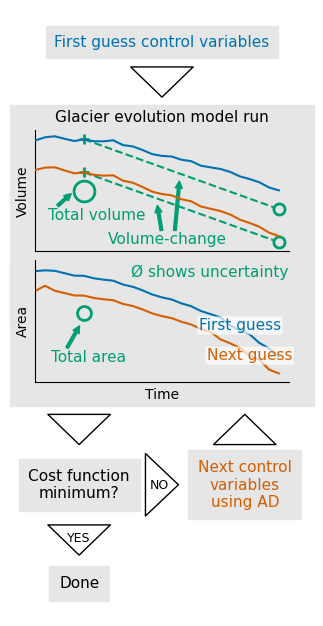

In [42]:
axis_label_fontsize = 11
text_fontsize = 11

color1 = 'C0'
color2 = 'C2'
color3 = 'C1'
facecolor = (0.9, 0.9, 0.9)

plot_stuff = True
plot_arrows = True
save_fig=True

arrow_length = 1.1
plot_spacing = 0.01

heights = [0.8,  # first guess
           0.01,
           arrow_length,
           0.2,
           3,  # volume
           #plot_spacing,
           3,  # area
           0.2,
           arrow_length,
           1.2,  # cost minimum
           arrow_length,
           0.1,
           0.8, # done
          ]

widths = [2, # cost minimum
          arrow_length,
          2, # update
         ]

cm = 1/2.54  # centimeters in inches
fig = plt.figure(constrained_layout=True, figsize=(8.3*cm, 20*cm),
                 #frameon=True,
                 #edgecolor='black',
                 #facecolor='green'
                )

gs = GridSpec(12, 3,
                      width_ratios=widths,
                      height_ratios=heights,
                      wspace=0.2, hspace=0.2,
                      )

ax_fg = fig.add_subplot(gs[0, :])
ax_ar1 = fig.add_subplot(gs[2, :])
ax_v = fig.add_subplot(gs[4, :])
ax_a = fig.add_subplot(gs[5, :])
ax_ar2 = fig.add_subplot(gs[7, 0])
ax_ar3 = fig.add_subplot(gs[7, 2])
ax_min = fig.add_subplot(gs[8, 0])
ax_ar4 = fig.add_subplot(gs[8, 1])
ax_upd = fig.add_subplot(gs[8, 2])
ax_ar5 = fig.add_subplot(gs[9, 0])
ax_don = fig.add_subplot(gs[11, 0])

if plot_stuff:
    plot_fg_text(ax_fg, color1, text_fontsize, facecolor, pad=6)
    plot_volume_and_area(ax_v, ax_a, facecolor)
    plot_cost_fkt_min_text(ax_min, text_fontsize, facecolor)
    plot_update_controls_text(ax_upd, text_fontsize, color2, facecolor)
    plot_done_text(ax_don, text_fontsize, facecolor)

if plot_arrows:
    plot_arrow(ax_ar1, 'down')
    plot_arrow(ax_ar2, 'down')
    plot_arrow(ax_ar3, 'up')
    plot_arrow(ax_ar4, 'right')
    ax_ar4.text(0.5 - 0.05,
                0.5,
                'NO',
                transform=ax_ar4.transAxes,
                fontsize=text_fontsize - 2,
                ha='center', va='center',
                zorder=1
               )
    plot_arrow(ax_ar5, 'down')
    ax_ar5.text(0.5,
                0.5 + 0.05,
                'YES',
                transform=ax_ar5.transAxes,
                fontsize=text_fontsize - 2,
                ha='center', va='center',
                zorder=1,
               )

show_spine_axs = []  # [ax_upd, ax_ar1, ax_ar2, ax_ar3, ax_ar4, ax_ar5] # [ax_upd, ax_ar4, ax_fg, ax_ar1, ax_don]
for ax_show in show_spine_axs:
    ax_show.spines[['right', 'left', 'top', 'bottom']].set_visible(True)

if save_fig:
    if use_xkcd:
        filename = 'fundametal_principle.png'
    else:
        filename = 'fundametal_principle_glacier_clean.png'
    fig.savefig(os.path.join(output_folder, filename), dpi=400, bbox_inches='tight')